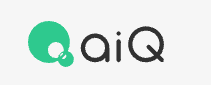

[disclaimer](./disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols first from tickers

In [2]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker="GOOG-US",
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US


####  Load the data to memory  
> Set data_type = 'fundamental_estimates' for loading consensus estimates

In [3]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,7,1.733212,1.726134,10,1.56650,1.89600,0.095883,2,2,2022-03-28,2022-04-05,2022-07-18,2023-09-30
1,WFJYTJ-R,SALES,USD,1,21921.696875,21874.500000,32,21548.00000,22579.90000,215.892876,2,0,2017-10-17,2017-10-17,2022-07-18,2017-09-30
2,WFJYTJ-R,SALES,USD,12,21953.200000,21953.200000,2,20322.40000,23584.00000,2306.299478,0,0,2015-01-30,2015-03-01,2022-07-18,2017-12-31
3,WFJYTJ-R,SALES,USD,1,78726.885635,78878.000000,38,77290.00000,80300.00000,780.249687,8,7,2024-02-09,2024-02-14,2022-07-18,2024-03-31
4,WFJYTJ-R,EPS,USD,11,0.545960,0.545960,2,0.51238,0.57954,0.047489,0,0,2016-02-02,2016-02-02,2022-07-18,2018-09-30


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [4]:
# Get 'sales' and 'EPS' items only.
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,1,76167.673916,76500.000000,35,63131.000000,80407.000000,2586.590276,2,6,2023-01-25,2023-01-26,2022-07-18,2022-12-31
1,WFJYTJ-R,EPS,USD,3,1.256909,1.260453,27,1.110000,1.370000,0.060212,1,11,2023-01-23,2023-01-26,2022-07-18,2023-06-30
2,WFJYTJ-R,SALES,USD,4,4780.194286,4788.410000,7,4619.280000,4945.570000,101.778761,2,0,2008-05-05,2008-06-18,2022-07-18,2009-03-31
3,WFJYTJ-R,SALES,USD,3,4748.918462,4752.000000,13,4440.690000,5043.200000,144.300364,0,4,2008-10-06,2008-10-07,2022-07-18,2009-03-31
4,WFJYTJ-R,EPS,USD,2,0.250167,0.249242,37,0.230223,0.294035,0.012065,0,2,2012-04-09,2012-04-09,2022-07-18,2012-06-30


#### Specifying release timings

In [5]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,7,0.821560,0.783000,13,0.679576,1.032500,0.103909,3,2,2020-07-13,2020-07-14,2022-07-18,2021-12-31
1,WFJYTJ-R,SALES,USD,2,70832.419697,70794.000000,33,67104.000000,78809.000000,2153.362967,6,0,2021-10-11,2021-10-11,2022-07-18,2021-12-31
2,WFJYTJ-R,SALES,USD,2,48028.192190,48236.600000,21,44267.800000,49713.200000,1365.154076,11,0,2020-11-25,2020-11-30,2022-07-18,2021-03-31
3,WFJYTJ-R,EPS,USD,6,0.621691,0.690884,12,0.258000,0.813500,0.174327,0,7,2020-04-24,2020-04-26,2022-07-18,2021-06-30
4,WFJYTJ-R,CFPS,USD,4,1.043506,0.910212,3,0.854549,1.365757,0.280462,0,1,2020-07-15,2020-07-16,2022-07-18,2021-03-31
